In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Importing the dataset
data = pd.read_csv("data.csv")

# Feature Engineering
data['radius_mean'] = (data['radius1'] + data['radius2'] + data['radius3']) / 3
data['concavity_mean'] = (data['concavity1'] + data['concavity2'] + data['concavity3']) / 3

# Splitting target variable and independent variables
X = data.drop(['Diagnosis'], axis=1)
y = data['Diagnosis']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Default DecisionTreeClassifier
default_dt = DecisionTreeClassifier(random_state=42)
default_dt.fit(X_train, y_train)
default_pred = default_dt.predict(X_test)
default_accuracy = accuracy_score(y_test, default_pred)

print("Default DecisionTreeClassifier Accuracy:", default_accuracy)

# Hyperparameter tuning with RandomizedSearchCV
param_dist = {
    'max_depth': [None, 10, 20, 30, 40],  
    'min_samples_split': randint(2, 21),  
    'min_samples_leaf': randint(1, 9),
    'max_features': ['auto', 'sqrt', 'log2'],  
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}


dt_model = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=dt_model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

best_dt = random_search.best_estimator_
best_pred = best_dt.predict(X_test)
best_accuracy = accuracy_score(y_test, best_pred)


Default DecisionTreeClassifier Accuracy: 0.9385964912280702
Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\iamge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
210 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\iamge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\iamge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\iamge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py",

In [4]:

print("Base DecisionTreeClassifier - Default Accuracy::", default_accuracy)
print("Tuned DecisionTreeClassifier - Best Accuracy:", best_accuracy)
print("Improvement over default:", -(default_accuracy - best_accuracy))
print("Best parameters found:", random_search.best_params_)

Base DecisionTreeClassifier - Default Accuracy:: 0.9385964912280702
Tuned DecisionTreeClassifier - Best Accuracy: 0.9649122807017544
Improvement over default: 0.02631578947368418
Best parameters found: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 20, 'splitter': 'best'}


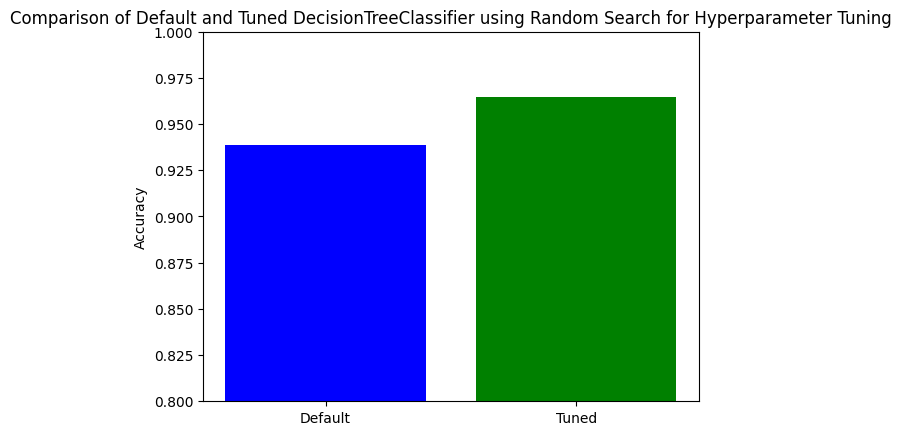

In [6]:
import matplotlib.pyplot as plt

# Plotting
labels = ['Default', 'Tuned']
accuracies = [default_accuracy, best_accuracy]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.title('Comparison of Default and Tuned DecisionTreeClassifier using Random Search for Hyperparameter Tuning')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.show()